In [53]:
import pandas as pd
import numpy as np


In [54]:
df=pd.read_csv("C:\\Users\\Akshat.Dubey.000\\Desktop\\vgsales.csv")

In [135]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [136]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


In [137]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [138]:
df=df.dropna()

In [139]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [140]:
x=df[["NA_Sales"]]
y=df[["Global_Sales"]]

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [143]:
import matplotlib.pyplot as plt

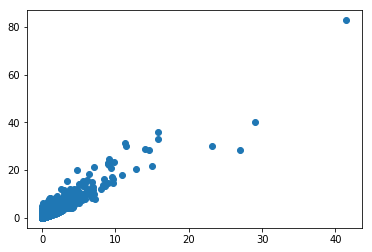

In [144]:
plt.scatter(x,y)

# Plotting learning curve

In [154]:
def plot_learning_curve(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_test))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

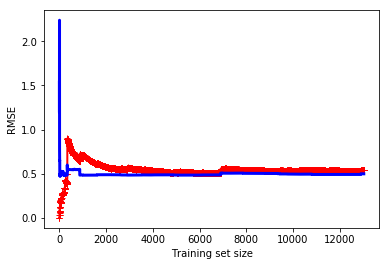

In [155]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
plot_learning_curve(lr,x,y)

In [157]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.8)

In [158]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [159]:
lr.coef_

array([[1.81904092]])

In [160]:
lr.intercept_

array([0.06654319])

In [161]:
from sklearn.metrics import mean_squared_error
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.4999133275626849


In [162]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8741741533502444
